![ecosystems](ecosystems.png)

As more animals face endangerment, understanding environmental impacts is key. Conservation groups analyze habitat and survival data to identify beneficial or harmful patterns. This helps target efforts like habitat restoration or policy changes. If certain environments prove better for wildlife, efforts are concentrated there. Acting as a conservation data scientist, you'll leverage data to inform conservation decisions by identifying the area where these efforts are needed most urgently.

This project is about both factor analysis and survival analysis. Factor analysis is useful in market research to identify underlying customer preferences, in human resources to understand employee satisfaction drivers, and in finance to assess investment risks by identifying underlying factors. Survival analysis is applied in real-life business contexts like customer churn prediction, analyzing the lifespan of products in the market, and estimating the time to failure for machinery in manufacturing settings.

The `factor_data.csv` and `survival_data.csv` files encompass vital information for analyzing how environmental factors influence wildlife populations. 

`factor_data.csv` includes metrics on environmental and biological variables across various habitats:

| Variable            | Description                                     |
|---------------------|-------------------------------------------------|
| `AirQuality`        | Index of air quality in the habitat             |
| `Temperature`       | Scaled average temperature in the habitat              |
| `DeforestationRate` | Scaled rate of deforestation in the area               |
| `SpeciesDiversity`  | Average number of different species in the habitat      |
| `ReproductiveRates` | Scaled average reproductive rates of species in habitat|

`survival_data.csv` contains survival details of individual animals or populations, linking back to the environmental conditions:

| Variable       | Description                                             |
|----------------|---------------------------------------------------------|
| `Survival_Time` | Time until the event (death) occurs                     |
| `Censuring_Status`       | Event observed (1) or censored (0)        |
| `Habitat`       | Five different types of wildlife habitats       |

In [63]:
# Import packages
if (!requireNamespace("survminer", quietly = TRUE)) install.packages("survminer")
if (!requireNamespace("GPArotation", quietly = TRUE)) install.packages("GPArotation")
library(psych)
library(survival)
library(survminer)
library(readr)
library(broom)
library(GPArotation)

# Load the factor_data.csv
factor_data <- read_csv("factor_data.csv")

# Load the survival_data.csv
survival_data <- read_csv("survival_data.csv")


Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): AirQuality, Temperature, DeforestationRate, SpeciesDiversity, Repro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Habitat
dbl (2): Survival_Time, Censoring_Status

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [64]:
# Start of code
cor_factor_data <- cor(factor_data)
cor_factor_data

,AirQuality,Temperature,DeforestationRate,SpeciesDiversity,ReproductiveRates
AirQuality,1.0000000,0.4813444,0.3564715,0.2847500,0.1714816
Temperature,0.4813444,1.0000000,0.2378298,0.1926270,0.1225498
DeforestationRate,0.3564715,0.2378298,1.0000000,0.5225307,0.3746953
SpeciesDiversity,0.2847500,0.1926270,0.5225307,1.0000000,0.4421556
ReproductiveRates,0.1714816,0.1225498,0.3746953,0.4421556,1.0000000


In [65]:
#correlation with SpeciesDiversity - AirQuality = 0.2847500, Temperature = 0.1926270, DeforestationRate = 0.5225307, ReproductiveRates = 0.4421556 - it appears that DeforestationRate is the biggest factor

most_impactful_factor <- "DeforestationRate"

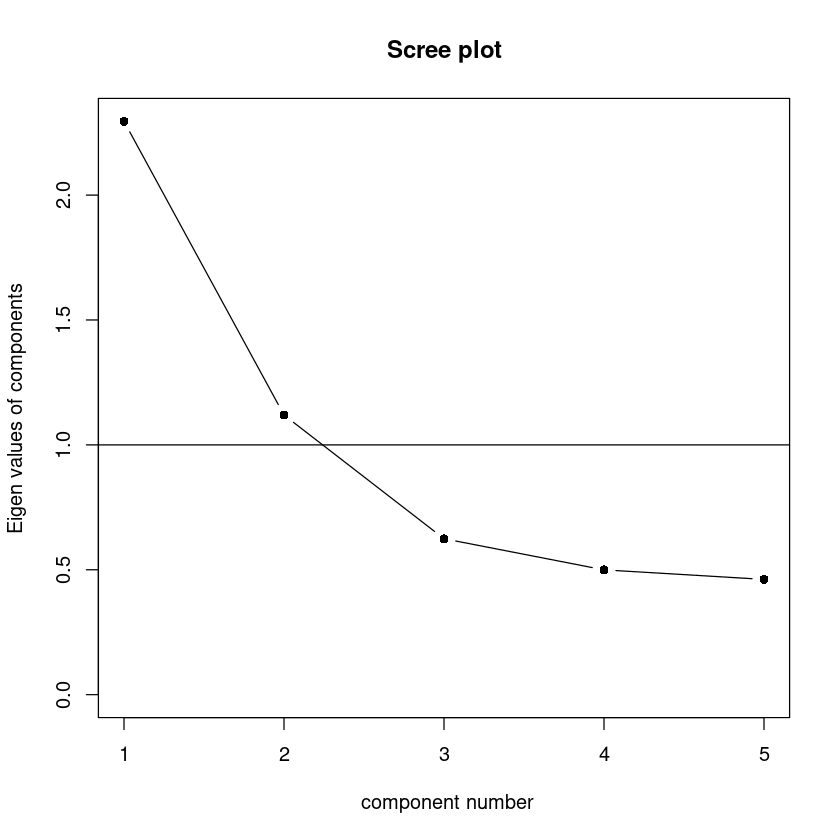

In [66]:
#Exploratory Analysis

scree(cor_factor_data, factors =FALSE)

In [67]:
#from scree plot, retain two factors considering eigenvalue of 1

num_factors <- 2

EFA_model <- fa(factor_data, nfactors = num_factors)
EFA_model

Factor Analysis using method =  minres
Call: fa(r = factor_data, nfactors = num_factors)
Standardized loadings (pattern matrix) based upon correlation matrix
                   MR1   MR2   h2   u2 com
AirQuality        0.00  0.87 0.76 0.24 1.0
Temperature       0.02  0.54 0.30 0.70 1.0
DeforestationRate 0.61  0.14 0.47 0.53 1.1
SpeciesDiversity  0.79 -0.03 0.61 0.39 1.0
ReproductiveRates 0.60 -0.07 0.32 0.68 1.0

                       MR1  MR2
SS loadings           1.37 1.09
Proportion Var        0.27 0.22
Cumulative Var        0.27 0.49
Proportion Explained  0.56 0.44
Cumulative Proportion 0.56 1.00

 With factor correlations of 
     MR1  MR2
MR1 1.00 0.45
MR2 0.45 1.00

Mean item complexity =  1
Test of the hypothesis that 2 factors are sufficient.

df null model =  10  with the objective function =  0.99 with Chi Square =  991.46
df of  the model are 1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the 

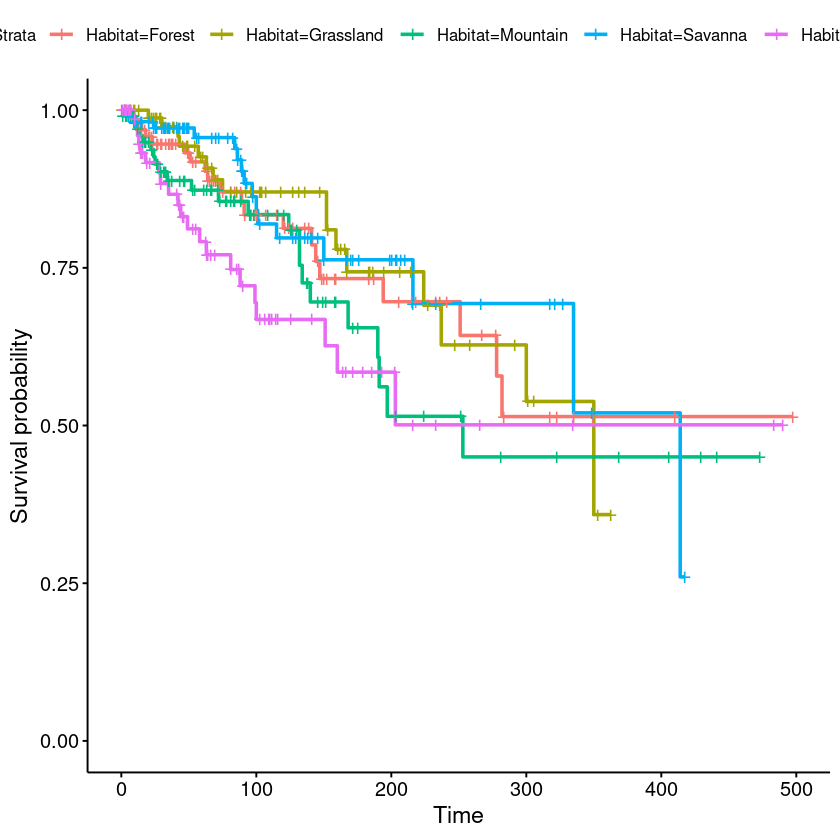

In [68]:
survival_fit <- survfit(Surv(Survival_Time, Censoring_Status) ~ Habitat, data = survival_data)

survival_fit_df <- tidy(survival_fit)

ggsurvplot(survival_fit, data = survival_data)

In [69]:
low_surv_habitat <- "Savanna"
low_surv_habitat

[1] "Savanna"